# Friends Emotionlines sentiment analysis using CNN


참고자료: https://github.com/Parkchanjun/KU-NLP-2020-1/blob/master/%5B3%5D%20CNN_Sentiment_Analysis.ipynb

**1. 데이터셋 다운 및 구글 드라이브에 업로드**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#밑에 나오는 url로 가서 허용하고 그 코드 밑에 복사하고 엔터 하시면 됩니다
#glove랑 friends파일이 커서 데이터를 구글드라이브에 저장하고 거기서 불러오는 방식으로 했습니다.
"""
Glove 다운로드
glove파일 http://nlp.stanford.edu/data/glove.6B.zip 여기서 받고 압축풀어서 자신의 구글드라이브에 업로드 해주세요

Friends 데이터 다운
friends파일(유니코드 제거ver)
friends_test.json  https://drive.google.com/file/d/10rCWTr2OMoiw3JJDja-9e1kwoETvoDmF/view?usp=sharing, 
friends_train.json     https://drive.google.com/file/d/1XMtL50HI3h4X-3a7hIKw9s4G9VdevDIQ/view?usp=sharing, 
friends_dev.json     https://drive.google.com/file/d/1gdx-PO4vDmO7ngI5Z05QZs3etOcui-cg/view?usp=sharing
"""
#위 주소에서 받고 압축풀어서 자신의 구글드라이브에 업로드 해주세요

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


'\nfriends파일(유니코드 제거ver)\nfriends_test.json  https://drive.google.com/file/d/10rCWTr2OMoiw3JJDja-9e1kwoETvoDmF/view?usp=sharing, \nfriends_train.json     https://drive.google.com/file/d/1XMtL50HI3h4X-3a7hIKw9s4G9VdevDIQ/view?usp=sharing, \nfriends_dev.json     https://drive.google.com/file/d/1gdx-PO4vDmO7ngI5Z05QZs3etOcui-cg/view?usp=sharing\n'

**2. 패키지 선언 및 Glove 다운로드**

In [ ]:
import os
import numpy as np
import nltk
import json
import random
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
nltk.download('punkt')

Using TensorFlow backend.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**3. 학습 데이터와 평가 데이터**



In [ ]:
def tokenize():
    sentiment = ['neutral', 'joy', 'sadness', 'fear', 'anger', 'surprise', 'disgust', 'non-neutral']

    sentiment2index = {}
    for voca in sentiment:
        if voca not in sentiment2index.keys():
            sentiment2index[voca] = len(sentiment2index)
    return sentiment2index

def read_dataset(dataset_type):
    max_seq_len = 0
    with open(dataset_type, "r", encoding="utf-8") as file_handler:
        json_2_line = json.load(file_handler)
        labels, sentences = [], []
        for line in json_2_line:
            for i in range(len(line)):
                sentence = line[i]['utterance']
                sentences.append(sentence)

                tok_sentence = nltk.word_tokenize(sentence)
                tok_key = nltk.word_tokenize(line[i]['emotion'])
                labels.append(sentiment2index[tok_key[0]])

                max_seq_len = max(max_seq_len, len(tok_sentence))

    return labels, sentences, max_seq_len
"""
def make_one_hot(sequences,dimension=8):
  results=np.zeros((len(sequences),dimension)) #10000차원으로 개수만큼 

  for i,sequence in enumerate(sequences):
    results[i,sequence]=1. #results[i]에서 특정 인덱스의 위치를 1로 만듭니다
  return results

TRAIN_LABELS=np.asarray(TRAIN_LABELS).astype('float32')
TEST_LABELS=np.asarray(TEST_LABELS).astype('float32')
"""

sentiment2index = tokenize()
###############################################################여기서 위에서 받은 구글드라이브에 있는 파일 경로 적어주면 됩니다
###############################################################왼쪽에 drive 폴더에 들어가서 friends 파일 찾고 오른쪽마우스로 '경로 복사'해서 붙여넣기
TRAIN_LABELS, TRAIN_SENTENCES, TRAIN_MAX_SEQ_LEN = read_dataset("/content/drive/My Drive/Colab Notebooks/Friends/friends_train.json") #학습데이터 읽기
TEST_LABELS, TEST_SENTENCES, TEST_MAX_SEQ_LEN = read_dataset("/content/drive/My Drive/Colab Notebooks/Friends/friends_test.json") #테스트데이터 읽기
MAX_SEQUENCE_LEN = max(TRAIN_MAX_SEQ_LEN, TEST_MAX_SEQ_LEN) #Train과 Test 전체에서 가장 긴 길이
#print(TEST_LABELS)
#x_train=make_one_hot(train_data)
#x_test=make_one_hot(test_data)
from keras.utils import to_categorical ##One-Hot-Encoding을 매우 쉽게 해주는 함수

TRAIN_LABELS=to_categorical(TRAIN_LABELS) #One-Hot-Encoding
TEST_LABELS=to_categorical(TEST_LABELS) #One-Hot-Encoding



print("Train : ", len(TRAIN_SENTENCES))
for train_label, train_sent in zip(TRAIN_LABELS, TRAIN_SENTENCES[0:30]):
  print(train_label, ':' ,train_sent)

print()
print("Test : ", len(TEST_SENTENCES))
for test_label, test_sent in zip(TEST_LABELS, TEST_SENTENCES[0:10]):
  print(test_label, ':' ,test_sent)

print("MAX_SEQUENCE_LEN", MAX_SEQUENCE_LEN)
"""
with open("./vocab.txt", "r", encoding="utf-8") as vocab_handle:
  VOCAB = [line.strip() for line in vocab_handle if len(line.strip()) > 0]
  print("Total vocabulary", VOCAB)
"""

Train :  10561
[1. 0. 0. 0. 0. 0. 0. 0.] : also I was the point person on my companys transition from the KL-5 to GR-6 system.
[1. 0. 0. 0. 0. 0. 0. 0.] : You mustve had your hands full.
[1. 0. 0. 0. 0. 0. 0. 0.] : That I did. That I did.
[1. 0. 0. 0. 0. 0. 0. 0.] : So lets talk a little bit about your duties.
[0. 0. 0. 0. 0. 1. 0. 0.] : My duties?  All right.
[1. 0. 0. 0. 0. 0. 0. 0.] : Now youll be heading a whole division, so youll have a lot of duties.
[1. 0. 0. 0. 0. 0. 0. 0.] : I see.
[1. 0. 0. 0. 0. 0. 0. 0.] : But therell be perhaps 30 people under you so you can dump a certain amount on them.
[1. 0. 0. 0. 0. 0. 0. 0.] : Good to know.
[1. 0. 0. 0. 0. 0. 0. 0.] : We can go into detail
[0. 0. 0. 1. 0. 0. 0. 0.] : No dont I beg of you!
[1. 0. 0. 0. 0. 0. 0. 0.] : All right then, well have a definite answer for you on Monday, but I think I can say with some confidence, youll fit in well here.
[0. 0. 0. 0. 0. 1. 0. 0.] : Really?!
[1. 0. 0. 0. 0. 0. 0. 0.] : Absolutely.  You can rela

'\nwith open("./vocab.txt", "r", encoding="utf-8") as vocab_handle:\n  VOCAB = [line.strip() for line in vocab_handle if len(line.strip()) > 0]\n  print("Total vocabulary", VOCAB)\n'

**4. Keras를 통한 전처리 과정**  
1) Text를 tokenize하여 id 값으로 변경해 줍니다. (tokenizer.texts_to_sequences)  
2) id로 변경해준 문장들을 모두 문장 최대 길이로 padding 처리해 줍니다. (pad_sequences)


In [ ]:
tokenizer = Tokenizer(num_words=None,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n' , lower=True, char_level=False) #토크나이저 생성
tokenizer.fit_on_texts(TRAIN_SENTENCES) #토큰나이즈 진행
TRAIN_SEQUENCES = tokenizer.texts_to_sequences(TRAIN_SENTENCES)#id로 변경
TEST_SEQUENCES = tokenizer.texts_to_sequences(TEST_SENTENCES)#id로 변경
VOCAB_SIZE = len(tokenizer.word_index) + 1

print(TRAIN_SENTENCES[0])
print(TRAIN_SEQUENCES[0])

X_train = pad_sequences(TRAIN_SEQUENCES, padding='post', maxlen=MAX_SEQUENCE_LEN) #패딩진행
X_test = pad_sequences(TEST_SEQUENCES, padding='post', maxlen=MAX_SEQUENCE_LEN) #패딩진행
print("PAD_SEQUENCES COMPLETES")
print(X_train[0])
print(MAX_SEQUENCE_LEN)

also I was the point person on my companys transition from the KL-5 to GR-6 system.
[409, 1, 35, 3, 760, 440, 29, 20, 2880, 2881, 127, 3, 2882, 1153, 4, 2883, 900, 901]
PAD_SEQUENCES COMPLETES
[ 409    1   35    3  760  440   29   20 2880 2881  127    3 2882 1153
    4 2883  900  901    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0]
91


**5. 모델 설정**  
1) Random으로 초기화된 임베딩이 아닌 pre-trained 된 GLoVE 임베딩으로 학습하고자 합니다.  
2) 따라서 학습 코퍼스에 있는 단어들 중 GLoVE 임베딩에 있는 단어들을 GLoVE 임베딩으로 초기화 해줍니다.  


In [ ]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

###############################################################여기도 마찬가지로 위에서 받은 구글드라이브에 있는 파일 경로 적어주면 됩니다
###############################################################왼쪽에 drive 폴더에 들어가서 glove 파일 찾고 오른쪽마우스로 '경로 복사'해서 붙여넣기
EMBEDDING_DIM = 200 #glove 파일 바꾸면 이거 바꿔야
embedding_matrix = create_embedding_matrix(
    '/content/drive/My Drive/Colab Notebooks/glove.6B.200d.txt',
    tokenizer.word_index, EMBEDDING_DIM
    )

**6. Accuracy와 Loss 시각화**  

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    accu = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(accu) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accu, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

**7. CNN 모델 선언**  

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 91)           0                                            
__________________________________________________________________________________________________
embedding_9 (Embedding)         (None, 91, 200)      1205800     input_9[0][0]                    
__________________________________________________________________________________________________
conv1d_33 (Conv1D)              (None, 90, 100)      40100       embedding_9[0][0]                
__________________________________________________________________________________________________
conv1d_34 (Conv1D)              (None, 89, 100)      60100       embedding_9[0][0]                
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 10561 samples, validate on 2764 samples
Epoch 1/5
10561/10561 [==============================] - 3s 291us/step - loss: 1.7067 - accuracy: 0.4135 - val_loss: 1.4483 - val_accuracy: 0.4931
Epoch 2/5
10561/10561 [==============================] - 3s 250us/step - loss: 1.4357 - accuracy: 0.4906 - val_loss: 1.3976 - val_accuracy: 0.5116
Epoch 3/5
10561/10561 [==============================] - 3s 252us/step - loss: 1.3219 - accuracy: 0.5271 - val_loss: 1.3796 - val_accuracy: 0.5235
Epoch 4/5
10561/10561 [==============================] - 3s 251us/step - loss: 1.2313 - accuracy: 0.5583 - val_loss: 1.3689 - val_accuracy: 0.5268
Epoch 5/5
10561/10561 [==============================] - 3s 245us/step - loss: 1.1468 - accuracy: 0.5888 - val_loss: 1.3544 - val_accuracy: 0.5304
[1.706659859988333, 1.4356615065670455, 1.3218888076527215, 1.2312621656392924, 1.1468363033416946]
[0.4135025, 0.49057853, 0.5271281, 0.55828047, 0.58877003]
2764/2764 [==============================] - 0s 144us/ste

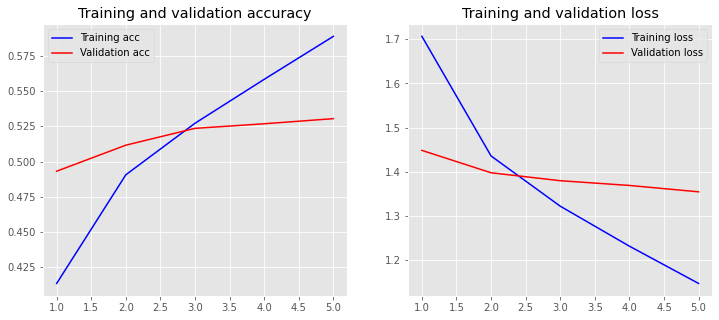

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.models import Model
from keras.layers import LeakyReLU
from keras import regularizers
from keras import losses


seq_input = layers.Input(shape=(MAX_SEQUENCE_LEN,), dtype='int32')

seq_embedded = layers.Embedding(VOCAB_SIZE, 
                           EMBEDDING_DIM, 
                           weights=[embedding_matrix], 
                           input_length=MAX_SEQUENCE_LEN, 
                           trainable=True)(seq_input)

filters = [2,3,4,5]
conv_models = []
for filter in filters:
  conv_feat = layers.Conv1D(filters=100, 
                            kernel_size=filter, 
                            activation='relu',
                            padding='valid'  )(seq_embedded) #Convolution Layer
                            #kernel_regularizer = regularizers.l2(1e-4),
                            #bias_regularizer = regularizers.l2(1e-4),
                            #activity_regularizer = regularizers.l2(1e-4)
                          
  pooled_feat = layers.GlobalMaxPooling1D()(conv_feat) #MaxPooling
  conv_models.append(pooled_feat)

conv_merged = layers.concatenate(conv_models, axis=1) #filter size가 2,3,4,5인 결과들 Concat

model_output = layers.Dropout(0.6)(conv_merged)
#model_output = layers.Dense(256, activation='relu')(model_output)
#model_output = layers.Dropout(0.3)(model_output)
#model_output = layers.Dense(128, activation='relu')(model_output)
#model_output = layers.Dropout(0.3)(model_output)
#model_output = layers.Dense(10, activation='relu')(model_output)
logits = layers.Dense(8, activation='softmax')(model_output)

model = Model(seq_input, logits) #(입력,출력)
model.compile(optimizer='adam',
              loss= losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
#'categorical_crossentropy'
model.summary()

#학습 시작
history = model.fit(X_train, TRAIN_LABELS,
                    epochs=5,
                    verbose=True,
                    validation_data=(X_test, TEST_LABELS),
                    batch_size=128)
print(history.history['loss'])
print(history.history['accuracy'])

from keras.models import load_model
model.save('KU_NLP') #모델 저장하기
from google.colab import files
#files.download('KU_NLP')  #이거 하면 모델 다운받아짐...


# 결과 시각화
plot_history(history)

#모델 평가
test_loss,test_acc=model.evaluate(X_test,TEST_LABELS)
print("Test_acc: ",test_acc)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


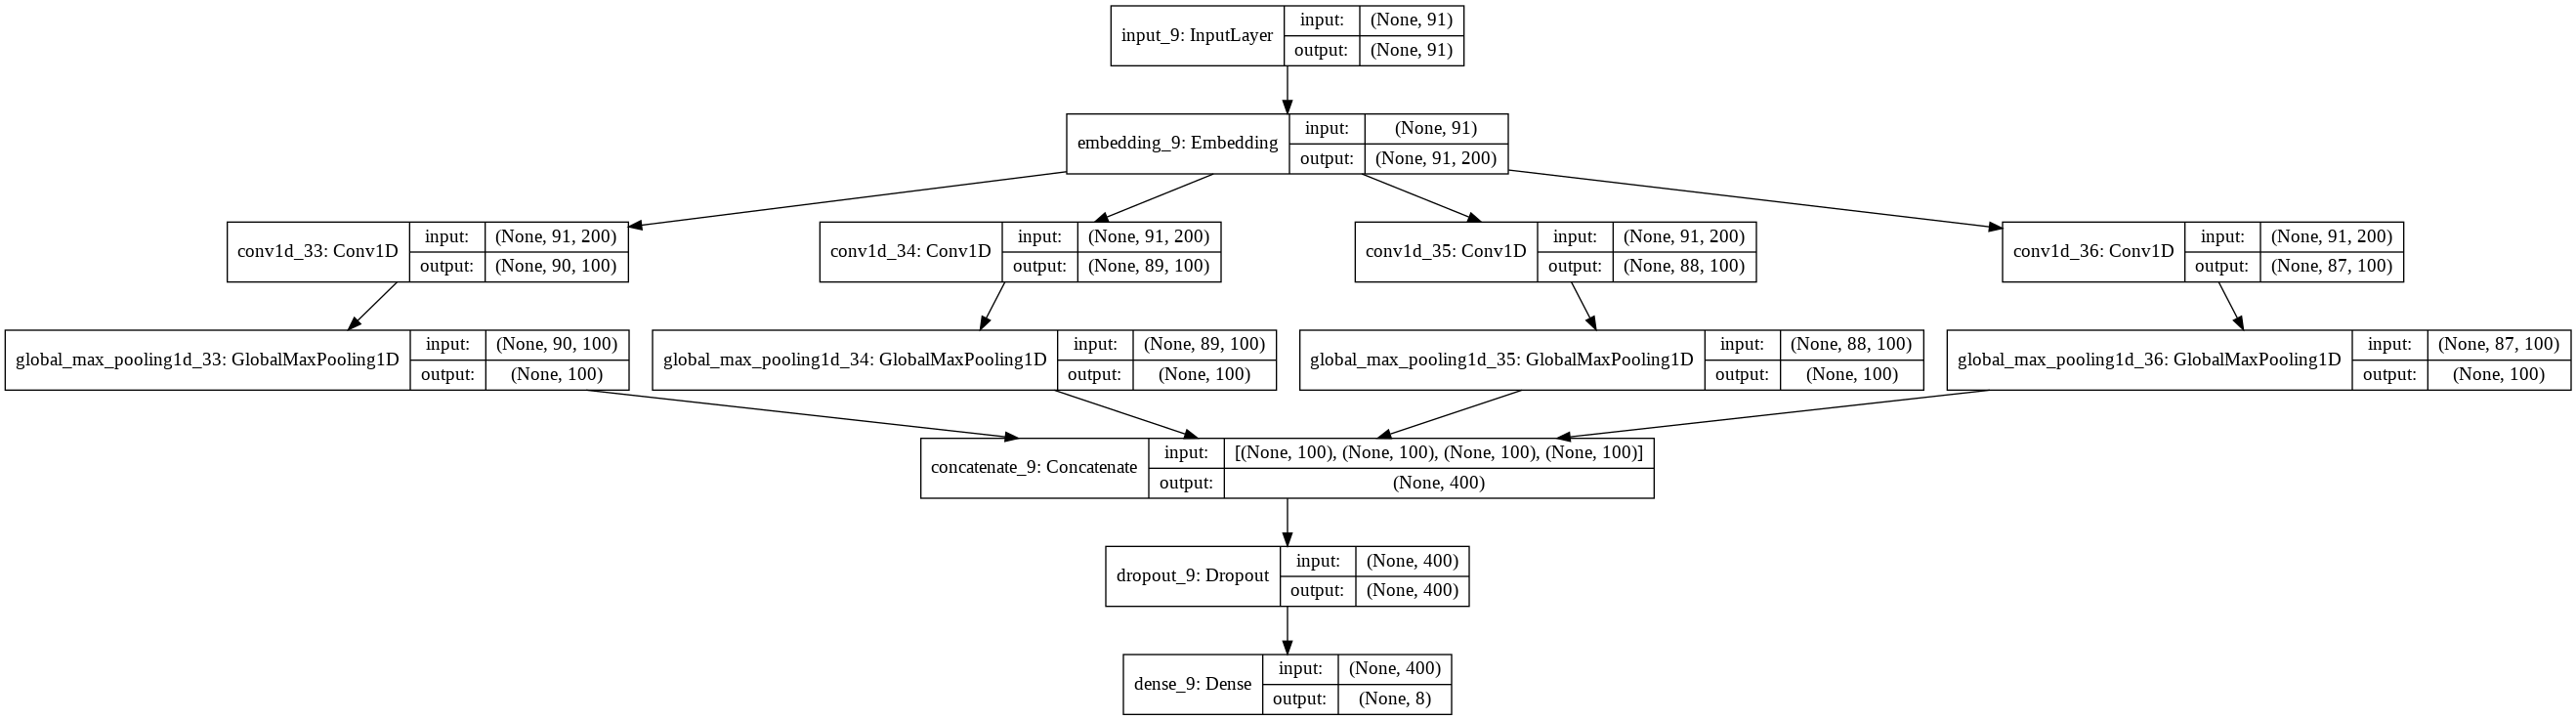

In [ ]:
from keras.models import load_model
model2 = load_model('KU_NLP') #모델 로딩하기 

from keras.utils.vis_utils import plot_model
plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

**8. 캐글 Leaderboard를 위한 CSV파일 생성**

In [ ]:
#캐글
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Friends/en_data.csv",encoding= 'unicode_escape')
sample = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Friends/en_sample.csv",encoding= 'unicode_escape')

caggle = data.utterance.tolist()
caggle_sequences = tokenizer.texts_to_sequences(caggle)
x_caggle = pad_sequences(caggle_sequences, padding='post', maxlen=MAX_SEQUENCE_LEN)


predictions = model.predict(
    x_caggle, batch_size=None, verbose=0, steps=None, callbacks=None, max_queue_size=10,
    workers=1, use_multiprocessing=False)
y_caggle=[]
for i in range(len(predictions)):
  y_caggle.append(np.argmax(predictions[i]))

sentiment = ['neutral', 'joy', 'sadness', 'fear', 'anger', 'surprise', 'disgust', 'non-neutral']
for i in range(len(y_caggle)):
  y_caggle[i] = sentiment[y_caggle[i]]
print(y_caggle)
dataframe = pd.DataFrame(y_caggle)
dataframe.to_csv("/content/drive/My Drive/Colab Notebooks/Friends/en_sample.csv",index='Expected', header=1)

['neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'non-neutral', 'neutral', 'neutral', 'surprise', 'sadness', 'surprise', 'neutral', 'neutral', 'neutral', 'neutral', 'surprise', 'neutral', 'neutral', 'neutral', 'non-neutral', 'neutral', 'non-neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'surprise', 'neutral', 'neutral', 'joy', 'surprise', 'neutral', 'neutral', 'surprise', 'surprise', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'surprise', 'neutral', 'non-neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'non-neutral', 'neutral', 'non-neutral', 'neutral', 'joy', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'joy', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 